In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df_train_label = pd.read_csv('/Users/toanngo/Documents/GitHub/capstone 2 data/raw data /train_labels.csv')
df_test = pd.read_csv('/Users/toanngo/Documents/GitHub/capstone 2 data/raw data /test_data.csv', nrows = 10**5)
df_train = pd.read_csv('/Users/toanngo/Documents/GitHub/capstone 2 data/raw data /train_data.csv', nrows = 10**5)

In [3]:
#Look at the train data train_label
#Note that D = Delinquency, S = Spend, P = Payment, B = Balance, R = Risk
df_train_label.head()
df_train_label.info()
df_train_label.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


(458913, 2)

In [4]:
#Look at the test data
df_test.head()
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 145.0+ MB


(100000, 190)

In [5]:
#Look at the train data
df_train.head()
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 145.0+ MB


(100000, 190)

In [6]:
print(df_train.columns == df_test.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

The train data has same columns with the test data with different year on S_2. It seems that American express is trying to predict behavior of customer in 2019 from the behavior of customer from previous years. Moreover, because they have same columns, the data cleaning we apply to train data can be applied to test data as well.

In [7]:
#check if customer_ID is unique for the data sets
df_train_label.customer_ID.is_unique
df_test.customer_ID.is_unique
df_train.customer_ID.is_unique

False

In [8]:
#Since the customer_ID is non-unique for test and train data, we figure out what is the issue
df_test.customer_ID.value_counts().head()
df_train.customer_ID.value_counts().head()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
02f57424c315f39d19f953eb76cce903723f030b7cd78bce93e6b99a2890301d    13
02f794f5f05c30b80f13a3b53340380348a260e347941bad411ab156c56a1225    13
02f780d5157b01f35406f8022751f73bad2b837117b943ac09951a7ad43d66c8    13
02f756bfb409720058bbb5a0d360dfa39a4cd51e45bb382a39a850e2ef5baac4    13
Name: customer_ID, dtype: int64

In [9]:
#We investigate the first customer_ID from train set'0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'
df_train[df_train.customer_ID == '0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'].iloc[:, :4]

,customer_ID,S_2,P_2,D_39
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940705,0.002183
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950845,0.009896
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868580,0.001082


This customer had 13 transactions from 2017 to 2018 which might contain important info for fraud detection. Therefore, we can not drop the duplicate customer_ID for train and test table. We now investigate further train and test table.

In [10]:
#Investigate df_train and df_test
categorical_train = df_train.select_dtypes(include=['object']) #select categorical columns
categorical_test = df_test.select_dtypes(include=['object'])

In [11]:
df_train.D_63.value_counts()
df_train.D_64.value_counts()
df_test.D_63.value_counts()
df_test.D_64.value_counts()

O    53306
U    26416
R    16863
Name: D_64, dtype: int64

Since there are only 2 categorical columns and they have limited distinct values, we can consider using one hot encoding when we build our model.

In [12]:
#Check missing value, note that these tables have 100000 rows each
missing_train = df_train.isna().sum().sort_values(ascending = False).to_frame('missing_count')
missing_test = df_test.isna().sum().sort_values(ascending = False).to_frame('missing_count')

In [13]:
#create a list of columns we will drop
to_drop_train = missing_train[missing_train['missing_count'] > 95000] #we drop if 95% or more is NaN
to_drop_test = missing_test[missing_test['missing_count'] > 95000]

In [14]:
print(to_drop_train)
print(to_drop_test)

       missing_count
D_87           99927
D_88           99850
D_108          99470
D_111          99366
D_110          99366
B_39           99327
D_73           98851
B_42           98645
D_134          96384
D_138          96384
D_135          96384
D_136          96384
D_137          96384
       missing_count
D_88           99931
D_87           99852
D_108          99378
D_111          98965
D_110          98965
B_39           98809
D_73           98722
B_42           97940
D_135          96618
D_137          96618
D_134          96618
D_136          96618
D_138          96618


Although there is some small difference in the order, the lists of dropped columns are the same for train and test data.

In [15]:
#drop unneccessary columns
to_drop = ['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42', 'D_134', 'D_138', 'D_135', 'D_136', 'D_137']
df_train = df_train.drop(to_drop, axis = 1)
df_test = df_test.drop(to_drop, axis = 1)

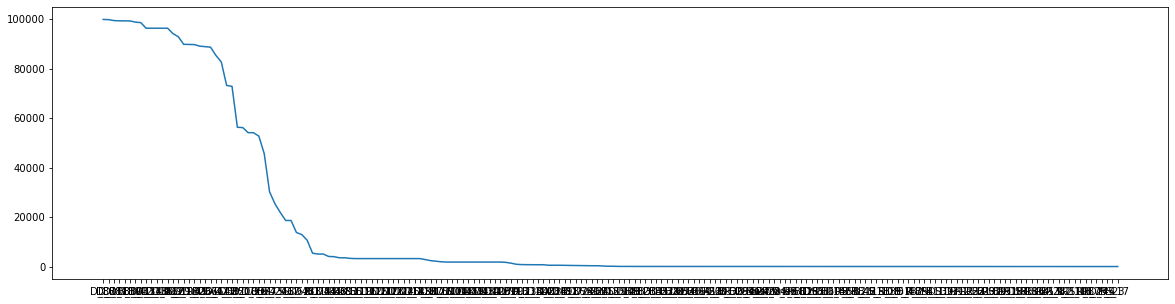

In [16]:
#plot for total missing values of columns
plt.figure(figsize = (20,5))
plt.plot(missing_train)
plt.show()

In [17]:
#fill NaN value with 0
df_train.fillna(0, inplace = True)
df_test.fillna(0, inplace = True)

In [18]:
#join with label, note that we only have label for train data set so we join df_train with label only
df_train = df_train.set_index('customer_ID').join(df_train_label.set_index('customer_ID'), on = 'customer_ID', how = 'inner')

In [19]:
#save for later use
df_train.to_csv(path_or_buf='~/Documents/GitHub/capstone 2 data/processed data /df_train.csv', index=False)
df_test.to_csv(df_train.to_csv(path_or_buf='~/Documents/GitHub/capstone 2 data/processed data /df_test.csv', index=False)
, index=False)